<a href="https://colab.research.google.com/github/nlajunior/quarentenadados/blob/master/Pandas_IO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas - Formatos diferentes de entrada e saída

### Aula 1

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

## Importando as bases dos dados

In [0]:
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking/?qtd=200&sexo=f')

In [0]:
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking/?qtd=200&sexo=m')

In [101]:
print(f'Quantidade de alunos: {str(nomes_f.shape[0] + nomes_m.shape[0])}')

Quantidade de alunos: 400


### Concatenando dois dataframes

In [0]:
frames = [nomes_f, nomes_m]
nomes = pd.concat(frames)['nome'].to_frame()

In [103]:
nomes.sample(10)

,nome
14,MARCELO
135,RUBENS
181,IRACEMA
78,WILSON
146,SAMARA
141,ORLANDO
25,BEATRIZ
34,SEBASTIAO
9,ALINE
5,JULIANA


### Adicionando uma colunas

> Indented block



In [0]:
np.random.seed(123)

In [0]:
total_alunos = len(nomes)

In [106]:
total_alunos

400

In [0]:
nomes['id_aluno'] = np.random.permutation(total_alunos)+1

In [108]:
nomes.head(10)

,nome,id_aluno
0,MARIA,235
1,ANA,43
2,FRANCISCA,304
3,ANTONIA,156
4,ADRIANA,343
5,JULIANA,310
6,MARCIA,55
7,FERNANDA,288
8,PATRICIA,379
9,ALINE,92


In [0]:
dominios = ['@dominio.com.br', '@servicodoemail.com']

In [0]:
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [111]:
nomes.head()

,nome,id_aluno,dominio
0,MARIA,235,@dominio.com.br
1,ANA,43,@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com
3,ANTONIA,156,@servicodoemail.com
4,ADRIANA,343,@servicodoemail.com


In [0]:
nomes['email'] = nomes['nome'].str.lower() + nomes['dominio']

nomes['email'] = nomes['nome'].str.cat(nomes['dominio'].str.lower())

In [113]:
nomes.head()

,nome,id_aluno,dominio,email
0,MARIA,235,@dominio.com.br,maria@dominio.com.br
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com


### Aula 2

In [114]:
!pip3 install html5lib
!pip3 install lxml

In [0]:
import html5lib 

In [0]:
url = 'http://tabela-cursos.herokuapp.com/index.html'


### Convertendo uma lista em um Dataframe

In [117]:
cursos = pd.read_html(url)
type(cursos)

list

In [118]:
cursos[0]

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [0]:
cursos = cursos[0]

In [120]:
type(cursos)

pandas.core.frame.DataFrame

In [121]:
cursos.rename(columns={'Nome do curso':'nome_curso'})

,nome_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [122]:
list(cursos.index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [0]:
cursos['id'] =  cursos.index + 1

In [124]:
cursos.head()

,Nome do curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


### Alterando o indice do dataframe

In [0]:
cursos = cursos.set_index('id')

In [0]:
cursos.rename(columns={'Nome do curso':'Curso'}, inplace=True)

In [127]:
cursos.head()


,Curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


## Aula 3

In [0]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos)*1.5).astype(int)

In [129]:
nomes.head(10)

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominio.com.br,maria@dominio.com.br,3
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,1
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,1
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com,3
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,1
5,JULIANA,310,@dominio.com.br,juliana@dominio.com.br,4
6,MARCIA,55,@dominio.com.br,marcia@dominio.com.br,2
7,FERNANDA,288,@dominio.com.br,fernanda@dominio.com.br,1
8,PATRICIA,379,@servicodoemail.com,patricia@servicodoemail.com,1
9,ALINE,92,@servicodoemail.com,aline@servicodoemail.com,4


In [130]:
nomes.matriculas.describe()

count    400.000000
mean       2.137500
std        1.511392
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

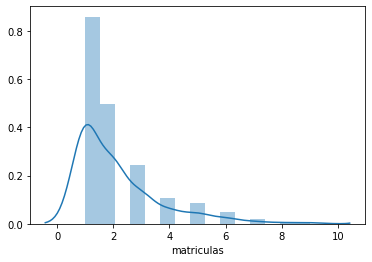

In [131]:
sns.distplot(nomes.matriculas)

In [132]:
nomes.matriculas.value_counts()

1    183
2    106
3     52
4     23
5     18
6     10
7      4
9      2
8      2
Name: matriculas, dtype: int64

### Selecionando cursos

In [0]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [0]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)
matriculas = pd.DataFrame(todas_matriculas, columns=['id_aluno', 'id_curso'])

In [0]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['Curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [136]:
matriculas_por_curso.head()

,quantidade_de_alunos,Curso
id_curso,,
1,8,Lógica de programação
2,81,Java para Web
3,18,C# para Web
4,17,Ruby on Rails
5,24,Cursos de Python


### Exportando para diferentes saídas

In [0]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [0]:
matriculs_json = matriculas_por_curso.to_json()

In [139]:
matriculs_json

'{"quantidade_de_alunos":{"1":8,"2":81,"3":18,"4":17,"5":24,"6":68,"7":4,"8":54,"9":68,"10":48,"11":57,"12":12,"13":45,"14":46,"15":26,"16":71,"17":37,"18":79,"19":59,"20":33},"Curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [0]:
matriculas_html =  matriculas_por_curso.to_html()

In [141]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>Curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>8</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>81</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>18</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>17</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>24</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>68</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>4</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>54</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>68</td>
      <td>

### Aula 4

In [142]:
!pip install sqlalchemy

In [0]:
from sqlalchemy import create_engine, MetaData, table

In [0]:
engine = create_engine('sqlite:///:memory:')

In [145]:
engine

Engine(sqlite:///:memory:)

In [0]:
matriculas_por_curso.to_sql('matriculas', engine)

In [147]:
print(engine.table_names())

['matriculas']


### Buscando no banco

In [0]:
query = 'select * from matriculas where quantidade_de_alunos<20'

In [149]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,Curso
0,1,8,Lógica de programação
1,3,18,C# para Web
2,4,17,Ruby on Rails
3,7,4,.NET para web
4,12,12,Hardware básico


In [150]:
pd.read_sql_table('matriculas', engine, columns=['Curso', 'quantidade_de_alunos'])

,Curso,quantidade_de_alunos
0,Lógica de programação,8
1,Java para Web,81
2,C# para Web,18
3,Ruby on Rails,17
4,Cursos de Python,24
5,PHP com MySql,68
6,.NET para web,4
7,Novas integrações com Java,54
8,TDD com Java,68
9,Código limpo com C#,48


In [0]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['Curso', 'quantidade_de_alunos'])

In [0]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 70')

In [153]:
muitas_matriculas

,Curso,quantidade_de_alunos
1,Java para Web,81
15,Estatística básica,71
17,Programação funcional,79


### Criando uma tabela com registros

In [0]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [155]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


### Aula 5

In [156]:
nomes.head()

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominio.com.br,maria@dominio.com.br,3
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,1
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,1
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com,3
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,1


In [157]:
matriculas_por_curso.head()

,quantidade_de_alunos,Curso
id_curso,,
1,8,Lógica de programação
2,81,Java para Web
3,18,C# para Web
4,17,Ruby on Rails
5,24,Cursos de Python


In [158]:
matriculas.head()

,id_aluno,id_curso
0,235,11
1,235,11
2,235,2
3,43,13
4,304,10


### Selecionando os alunos do curso com id_curso = 16

In [0]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))

In [160]:
proxima_turma.head(10)

,id_aluno,id_curso
21,174,16
22,174,16
23,218,16
28,217,16
77,262,16
97,358,16
131,278,16
135,122,16
144,265,16
157,203,16


### Apresentando a coluna nome com o join

In [161]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
2         CESAR
5      SEVERINA
6        CINTIA
13          EVA
19       VALMIR
         ...   
358     FABIANA
362     NIVALDO
376     AUGUSTO
384      RENATO
397      LILIAN
Name: nome, Length: 71, dtype: object

In [0]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [0]:
nome_do_curso = cursos.loc[id_curso]

In [174]:
type(nome_do_curso)

pandas.core.series.Series

In [175]:
nome_do_curso.Curso

'Estatística básica'

In [0]:
nome_do_curso = nome_do_curso.Curso

In [177]:
nome_do_curso

'Estatística básica'

In [168]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
2         CESAR
5      SEVERINA
6        CINTIA
13          EVA
19       VALMIR
         ...   
358     FABIANA
362     NIVALDO
376     AUGUSTO
384      RENATO
397      LILIAN
Name: nome, Length: 71, dtype: object

In [178]:
proxima_turma.head()

,nome
id_aluno,
2,CESAR
5,SEVERINA
6,CINTIA
13,EVA
19,VALMIR


In [0]:
proxima_turma = proxima_turma.rename(columns={'nome':'Alunos do curso de {}'.format(nome_do_curso)})

In [180]:
proxima_turma.sample(5)

,Alunos do curso de Estatística básica
id_aluno,
184,JUNIOR
134,GILSON
88,VALTER
95,BRENDA
190,IRENE


In [0]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [0]:
proxima_turma_excel = pd.read_excel('proxima_turma.xlsx')

In [183]:
proxima_turma_excel.head()

,Alunos do curso de Estatística básica
0,CESAR
1,SEVERINA
2,CINTIA
3,EVA
4,VALMIR
